In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [108]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [99]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
# Facet Grid - can be used to show the data in 3 dimension 
# X , Y and Hue
tips['time'].nunique() , tips['day'].nunique() , tips['smoker'].nunique()

(2, 4, 2)

## Facet Grid

c:\users\tejas\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


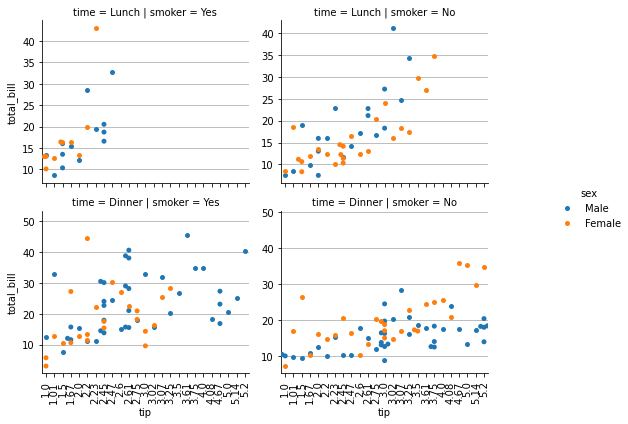

In [109]:
g = sns.FacetGrid( data = tips ,sharey=False, legend_out=True, row = 'time' , col = 'smoker' , hue = 'sex')
# showing Grid in the ouput
for i in range(tips['smoker'].nunique()):
    for j in range(tips['time'].nunique()):
        ax = g.facet_axis(i,j)
        ax = plt.grid()
# Instead of using the above code you can use sns.set_style('darkgrid')
g.set_xticklabels(rotation=90)        
g = g.map(sns.swarmplot  ,'tip' , 'total_bill').add_legend(bbox_to_anchor=(1.25, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.tight_layout()
#sns.swarmplot()

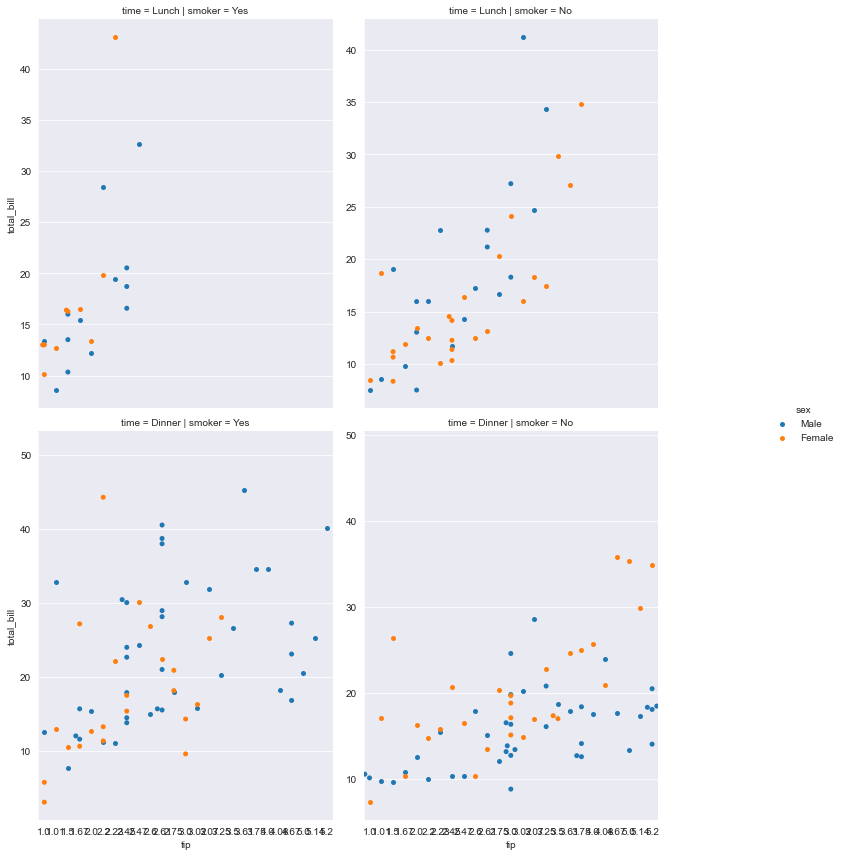

In [117]:
g = sns.FacetGrid( data = tips ,sharey=False, legend_out=True, row = 'time' , col = 'smoker' , hue = 'sex' , size = 6 ,
                  aspect = 0.7 )
# showing Grid in the ouput
sns.set_style('darkgrid')
g = g.map(sns.swarmplot  ,'tip' , 'total_bill').add_legend(bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()

c:\users\tejas\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\tejas\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


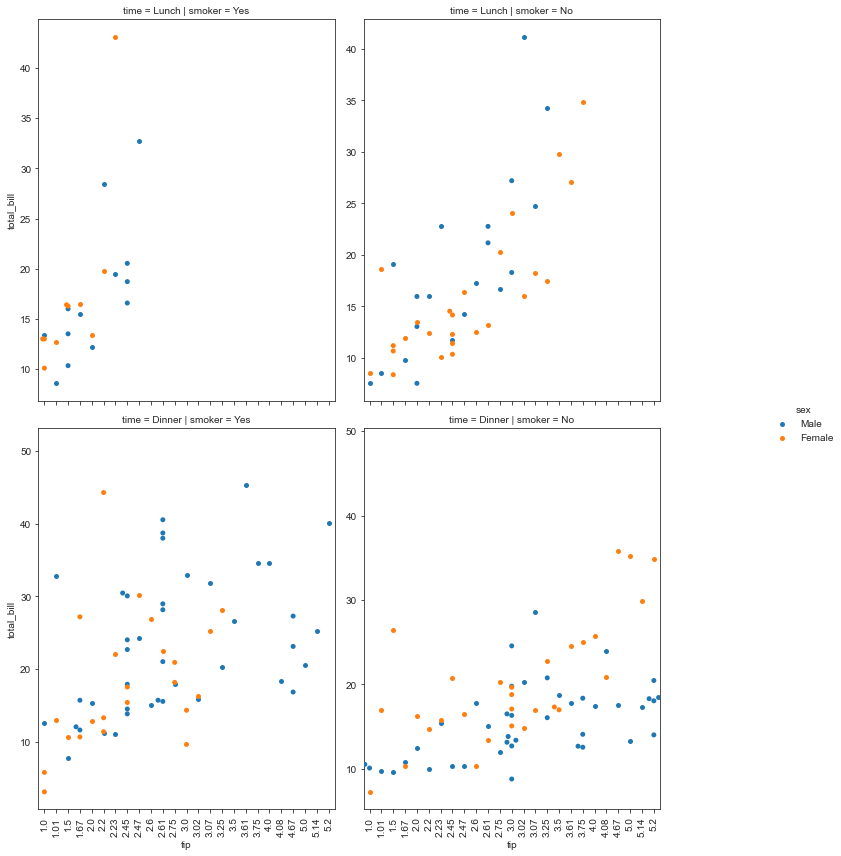

In [124]:
g = sns.FacetGrid( data = tips ,sharey=False, legend_out=True, row = 'time' , col = 'smoker' , hue = 'sex' , size = 6 ,
                  aspect = 0.7 )
# showing Grid in the ouput
g.set_xticklabels(rotation=90)  
sns.despine(top=False, right=False, left=False, bottom=False,)
sns.set_style("ticks", {"xtick.major.size": 3, "ytick.major.size": 8})
g = g.map(sns.swarmplot  ,'tip' , 'total_bill').add_legend(bbox_to_anchor=(1.25, 0.5))
plt.tight_layout()

## Pair Grid

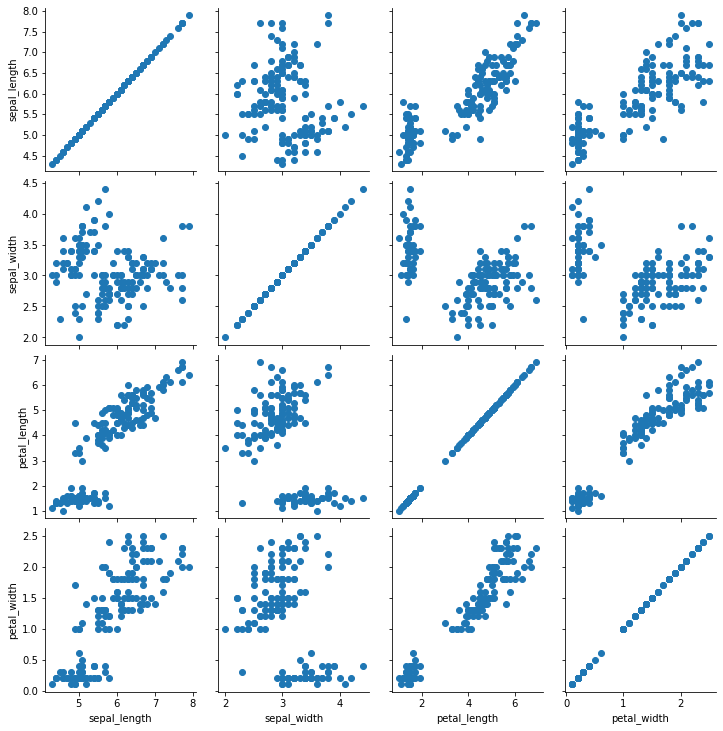

In [87]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

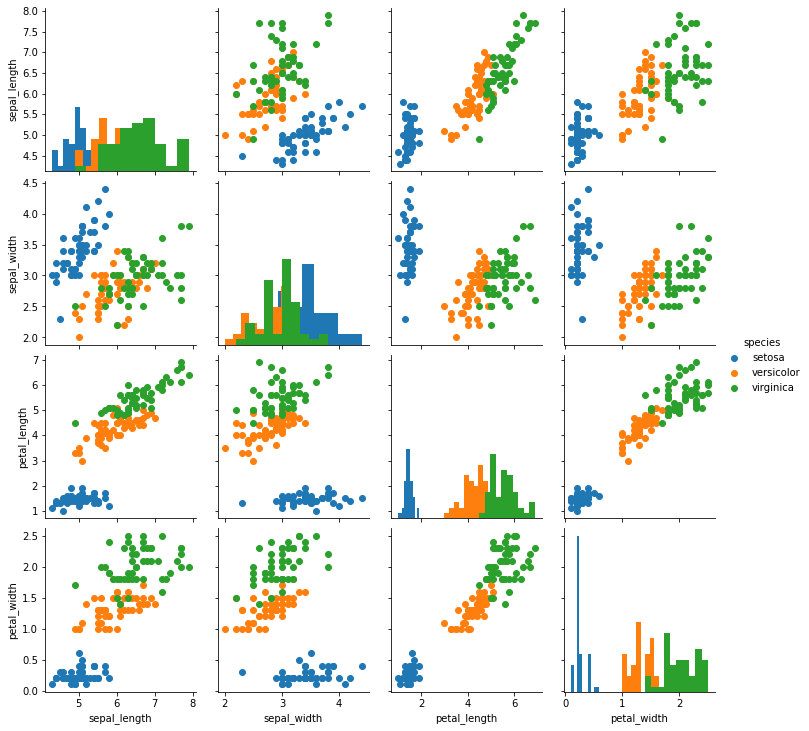

In [93]:
# We can specify what we want to plot along the diagonal
g = sns.PairGrid(iris , hue = 'species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

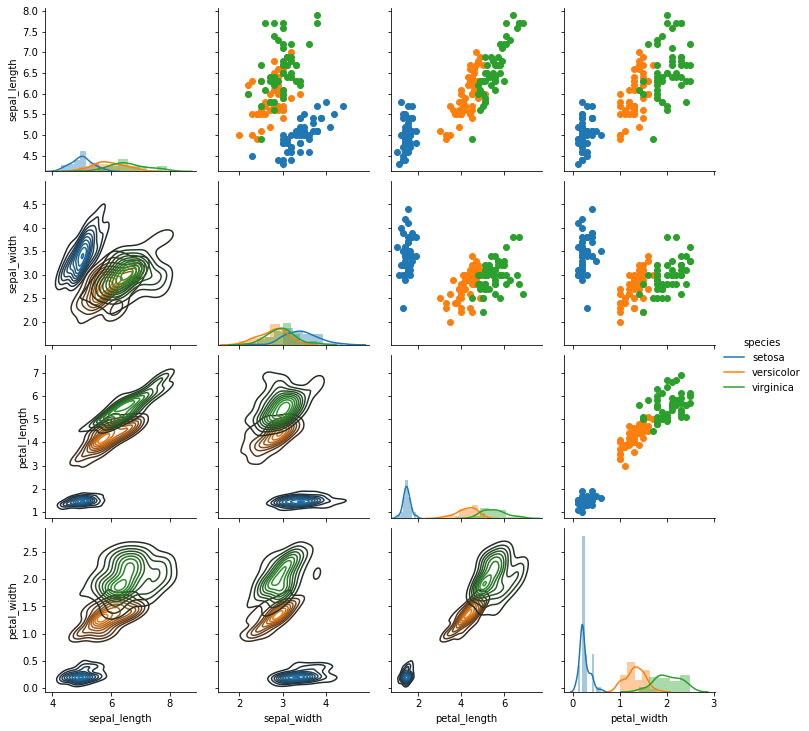

In [94]:
g = sns.PairGrid(iris , hue = 'species')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

## Joint Grid

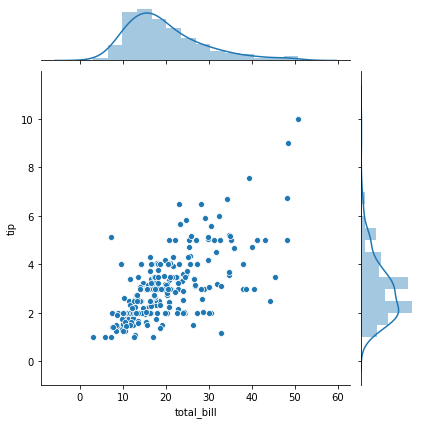

In [96]:
g = sns.JointGrid(x = 'total_bill' , y = 'tip' , data = tips)
g.plot(sns.scatterplot , sns.distplot)